In [1]:
import numpy as np
import matplotlib.pyplot as plt


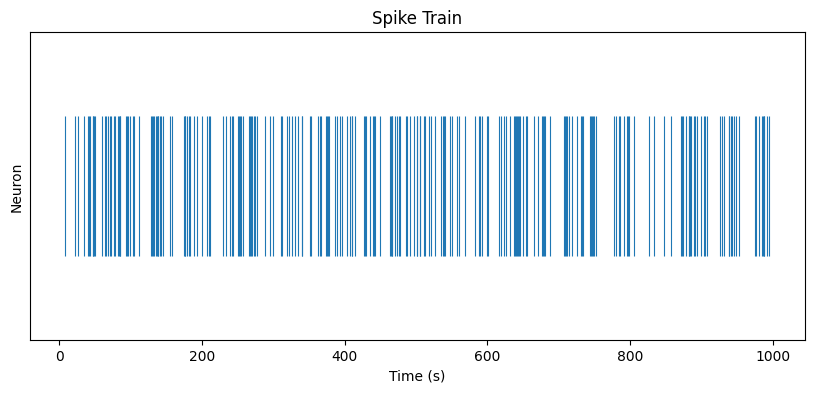

Total spikes: 231
Expected spikes: 250


In [2]:
# the neural code of the brain is more complex, and emerges not from isolated firing patterns, but from intricate, variable sequences of spikes distributed across neurons.

# s probability p is obtained from by the neuron’s firing rate [Hz=spikes/sec] --------- The Poisson distribution

r = 250 # firing rate spikes/s
#Let’s create a spike train with a length of 1 second and an average rate of 250 spikes per second. Each time bin will be 1 millisecond (∆t = 1 msec), resulting in 1000 time bins tota
T = 1
dt = 1000
p = r / dt # probability of spike per time bin


spike_train = np.random.choice([0, 1], size=dt, p=[1-p, p])
spiketimes = np.where(spike_train == 1)[0]

plt.figure(figsize=(10, 4))  # Make figure larger (12 inches wide, 8 inches tall)
plt.eventplot([spiketimes], orientation='horizontal', linelengths = 1, linewidths=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Neuron')
plt.title('Spike Train')
plt.yticks([])
plt.show()

print(f"Total spikes: {np.sum(spike_train)}")
print(f"Expected spikes: {r * T}")


# 1.2

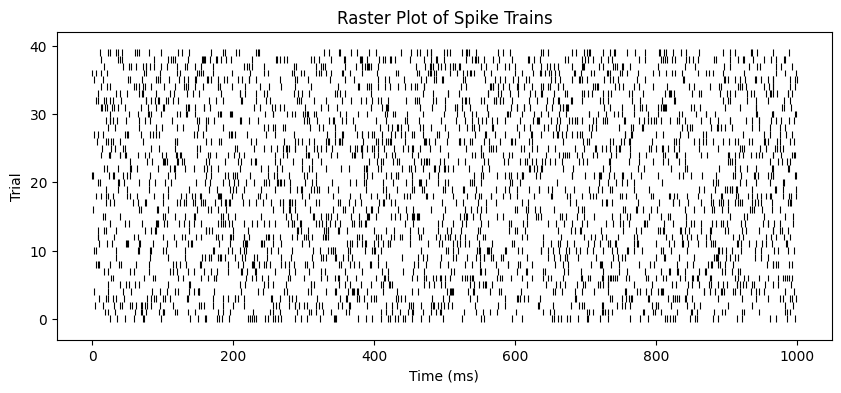

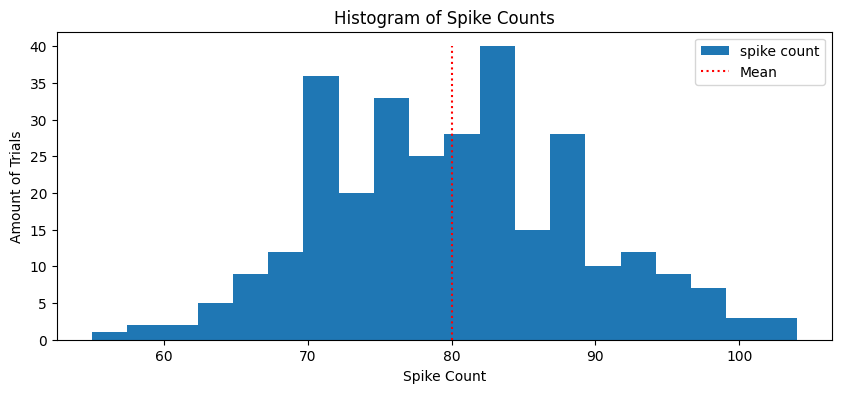

In [3]:

# 1.2
N = 300
r = 80  # spikes/s

T = 1
dt = 1000
p = r / dt  # probability of spike per time bin

meta_spiketimes = []
spike_counts = []  # to store spike counts for each trial

for n in range(N):
    spike_train = np.random.choice([0, 1], size=dt, p=[1 - p, p])
    spiketimes = np.where(spike_train == 1)[0]

    spike_counts.append(np.sum(spike_train))  # count spikes in current trial

    if n < 40:
        meta_spiketimes.append(spiketimes)

        #plt.eventplot([spiketimes], orientation='vertical', linelengths=1)


# gemini, make subplots for the figure below



plt.figure(figsize=(10, 4))  # Make figure larger (12 inches wide, 8 inches tall)
plt.eventplot(meta_spiketimes,  linelengths=1, linewidths=0.8, color = 'black')
plt.xlabel('Time (ms)')
plt.ylabel('Trial')
plt.title('Raster Plot of Spike Trains')
plt.show()

plt.figure(figsize=(10, 4))  # Make figure larger (12 inches wide, 8 inches tall)
plt.hist(spike_counts, bins=20, label = 'spike count')  # adjust bins as needed
plt.vlines(np.mean(spike_counts),0,40, color = 'red', linestyle = 'dotted', label = 'Mean')
plt.xlabel('Spike Count')
plt.ylabel('Amount of Trials')
plt.title('Histogram of Spike Counts')
plt.legend()
plt.show()


# 1.3
Interpretation of the CV:
# The CV represents the ratio of the standard deviation to the mean.  It's a standardized measure of dispersion.
# A CV close to zero indicates low variability relative to the mean.
# A higher CV suggests greater variability.  
# In this context (spike counts), a higher CV implies that the neuron's firing rate is less consistent across trials, exhibiting greater fluctuations around its mean firing rate. A lower CV, conversely, suggests a more regular firing pattern.


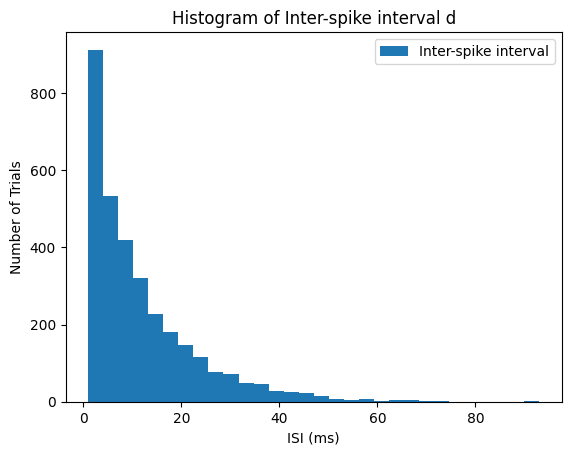

In [4]:
isi = [np.diff(spiketimes) for spiketimes in meta_spiketimes]

plt.hist(np.concatenate(isi), bins=30, label = 'Inter-spike interval')  # adjust bins as needed
plt.xlabel('ISI (ms)')
plt.ylabel('Number of Trials')
plt.title('Histogram of Inter-spike interval d')
plt.legend()
plt.show()



In [5]:
# Concatenate all ISIs into a single array
all_isis = np.concatenate(isi)

# Calculate the mean and standard deviation of the ISIs
mean_isi = np.mean(all_isis)
std_isi = np.std(all_isis)

# Calculate the coefficient of variation (CV)
cv = std_isi / mean_isi

print(f"Coefficient of Variation (CV) of ISIs: {cv}")

# Interpretation of the CV:
# The CV represents the ratio of the standard deviation to the mean of the inter-spike intervals.
# A CV close to zero indicates low variability in the timing of spikes.  This suggests a very regular firing pattern, where the time between spikes is highly consistent.
# A higher CV indicates greater variability in the timing of spikes. This means that the intervals between spikes are less consistent, with some intervals being much shorter or longer than others.  In a neuron this represents a less regular spiking pattern.
# The value of the CV provides a quantitative way to evaluate the regularity of the spike train.


Coefficient of Variation (CV) of ISIs: 0.9338277436881105


cv is almost exactly 1, which makes sense because we simulated the data with np.random.choice with probability p=r/dt, so we created a poisson distribution with the firing_rate as proportional to poisson coeff, so the CV of Isi is logically 1. The CV = 1, so spike gtrain is as regular as a poisson process,  because the spike train is a poisson process

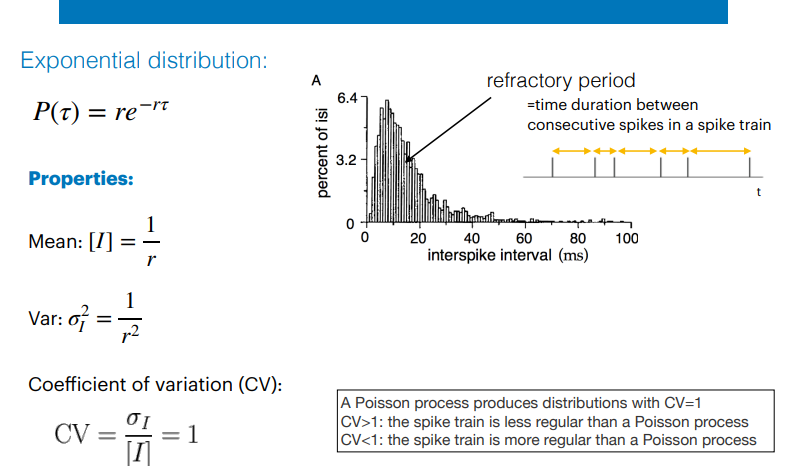

# 2.1


[   0    5   10   15   20   25   30   35   40   45   50   55   60   65
   70   75   80   85   90   95  100  105  110  115  120  125  130  135
  140  145  150  155  160  165  170  175  180  185  190  195  200  205
  210  215  220  225  230  235  240  245  250  255  260  265  270  275
  280  285  290  295  300  305  310  315  320  325  330  335  340  345
  350  355  360  365  370  375  380  385  390  395  400  405  410  415
  420  425  430  435  440  445  450  455  460  465  470  475  480  485
  490  495  500  505  510  515  520  525  530  535  540  545  550  555
  560  565  570  575  580  585  590  595  600  605  610  615  620  625
  630  635  640  645  650  655  660  665  670  675  680  685  690  695
  700  705  710  715  720  725  730  735  740  745  750  755  760  765
  770  775  780  785  790  795  800  805  810  815  820  825  830  835
  840  845  850  855  860  865  870  875  880  885  890  895  900  905
  910  915  920  925  930  935  940  945  950  955  960  965  970  975
  980 

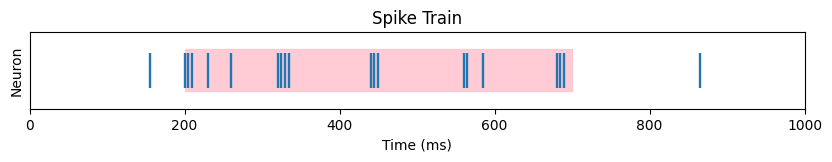

[[ 8.4 12.  15.7 19.6 23.6 25.9 27.7 35. ]]


In [13]:
from scipy.io import loadmat
data = loadmat('simdata.mat')
# print(data)
f1 = data['f1'][0]
raster_all = data['spt'][0]

t = data['t'][0]
dt = t[1]-t[0]

print(t)

spike_train1 = raster_all[0][0]
spiketimes = np.where(spike_train1 == 1)[0]

print("Sp", spike_train1)
print("Spike times:", spiketimes*5)

plt.figure(figsize=(10, 1))
plt.eventplot(spiketimes*5, orientation='horizontal', linelengths = 1, linewidths=1.7)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron')
plt.title('Spike Train')
plt.xlim(0,1000)

plt.fill_between((200,700), 0.4, 1.6, color = 'pink', alpha = 0.8)

plt.yticks([])
plt.show()

print(data['f1'])


# 2.2

In [7]:
meta_spiketimes = []
spike_counts = []  # to store spike counts for each spiketrain


meta_variance_spike_count = []
meta_mean_spike_count = []


for spike_train in raster_all:
    spike_train = spike_train[0]
    spt_stim = spike_train[40:140] ### 200 ms to 700 ms with dt=5ms

    spike_count_stim = np.sum(spt_stim)
    spike_counts.append(spike_count_stim)  # count spikes in current trial

    mean_spt = np.mean(spike_count_stim)

    meta_mean_spike_count.append(mean_spt)

mean_all = np.mean(meta_mean_spike_count)
variance_spt = np.var(meta_mean_spike_count)

print("mean number of spikes in each spike train:",mean_all)
print("variance of number of spikes in each spike train:",variance_spt)



mean_firing_rate = mean_all/0.5 # spikes / time elapsed (200-700 ms: 500 ms)
print("mean firing rate:",mean_firing_rate)



mean number of spikes in each spike train: 32.375
variance of number of spikes in each spike train: 132.734375
mean firing rate: 64.75


# 2.3

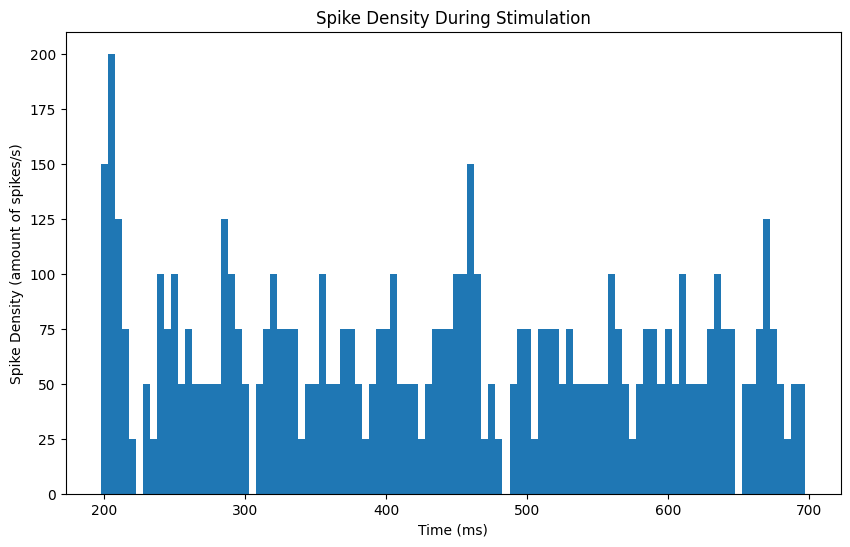

In [14]:
# Define the stimulation period (in samples)
stim_start = int(200 / dt)  # Convert time to sample index
stim_end = int(700 / dt)

delta_t = 5 # Time window in ms (adjust as needed)
delta_t_samples = int(delta_t / dt) # Convert to samples
spike_density = []

for i in range(stim_start, stim_end - delta_t_samples + 1, delta_t_samples):
    spikes_in_window = 0

    for spike_train in raster_all:
        spike_train = spike_train[0]
        spikes_in_window += np.sum(spike_train[i:i+delta_t_samples]) #count spikes in the window for current trial

    spike_density.append(spikes_in_window / (len(raster_all) * delta_t / 1000))  # Average over trials and divide by ∆t (in seconds)

time_points = np.arange(stim_start, stim_end - delta_t_samples + 1, delta_t_samples) * dt

plt.figure(figsize=(10, 6))
plt.bar(time_points, spike_density, width=delta_t)  #width defines the width of the bar
plt.xlabel('Time (ms)')
plt.ylabel('Spike Density (amount of spikes/s)')
plt.title('Spike Density During Stimulation')
plt.show()


# 2.4


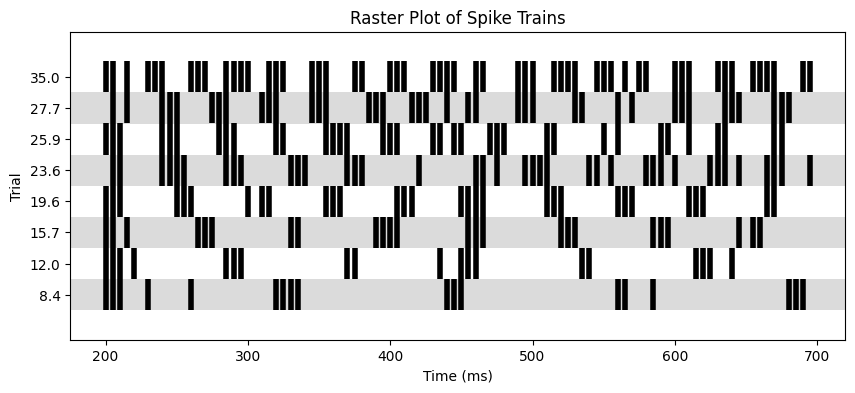

In [18]:
from scipy.io import loadmat
data = loadmat('simdata.mat')
# print(data)
f1 = data['f1'][0]
raster_all = data['spt'][0]

t = data['t'][0]
dt = t[1]-t[0]


meta_spiketimes = []

for spike_train in raster_all:
  spike_train = spike_train[0]
  spt_stim = spike_train[40:140] ### 200 ms to 700 ms with dt=5ms

  spiketimes = np.where(spt_stim == 1)[0]

  meta_spiketimes.append(spiketimes*5 + 200)


plt.figure(figsize=(10, 4))
# plt.fill_between((200,700), 0.4, 1.6, color = 'pink', alpha = 0.8)

for i in range (0,len(meta_spiketimes),1):
  if i % 2 == 0:
    plt.axhspan(i - 0.5, i + 0.5, facecolor='lightgrey', alpha=0.8)
  else:
    plt.axhspan(i - 0.5, i + 0.5, facecolor='white', alpha=0.8)

sorted_frequencies, sorted_indices = np.sort(data['f1'][0]), np.argsort(data['f1'][0])
plt.yticks(sorted_indices, sorted_frequencies)



plt.eventplot(meta_spiketimes, linelengths=1, linewidths=4, color = 'black')
plt.xlabel('Time (ms)')
plt.ylabel('Trial')
plt.title('Raster Plot of Spike Trains')
plt.show()


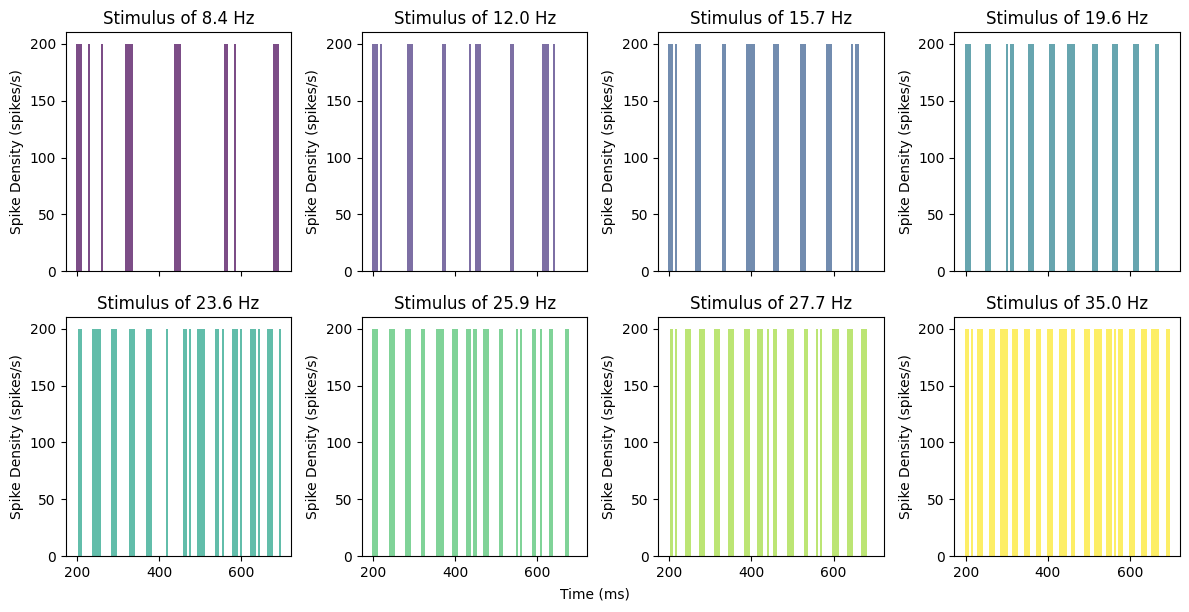

In [21]:
# Bar plots for spike density with improved layout
delta_t = 5  # Time window in ms
delta_t_samples = int(delta_t / dt)
stim_start = int(200 / dt)
stim_end = int(700 / dt)

num_subplots = len(raster_all)  # Number of subplots needed

# Calculate grid dimensions for subplots (e.g., 2x4 for 8 subplots)
num_cols = 4  # Number of columns
num_rows = int(np.ceil(num_subplots / num_cols))

# Create subplots with adjusted size and grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows), sharex=True)

# Flatten axes for easier iteration
axes = axes.flatten()

cmap = plt.get_cmap('viridis')  #
# Generate a colormap with distinct colors for each trial
colors = cmap(np.linspace(0, 1, num_subplots))

for i, spike_train in enumerate(raster_all):
    spike_train = spike_train[0]
    spike_density = []

    for j in range(stim_start, stim_end - delta_t_samples + 1, delta_t_samples):
        spikes_in_window = np.sum(spike_train[j:j + delta_t_samples])
        spike_density.append(spikes_in_window / (delta_t / 1000))

    time_points = np.arange(stim_start, stim_end - delta_t_samples + 1, delta_t_samples) * dt

    # Plot on the current subplot with assigned color
    axes[i].bar(time_points, spike_density, width=delta_t, label=f'Stimulus {i + 1}', color=colors[i], alpha=0.7)
    axes[i].set_ylabel('Spike Density (spikes/s)')
    axes[i].set_title(f'Stimulus of {sorted_frequencies[i]} Hz')
    # axes[i].legend()  # You can uncomment to show legends if needed

# Remove extra empty subplots if num_subplots doesn't perfectly fit the grid
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Set common x-axis label
fig.text(0.5, 0.0, 'Time (ms)', ha='center', va='center')
plt.tight_layout()
plt.show()




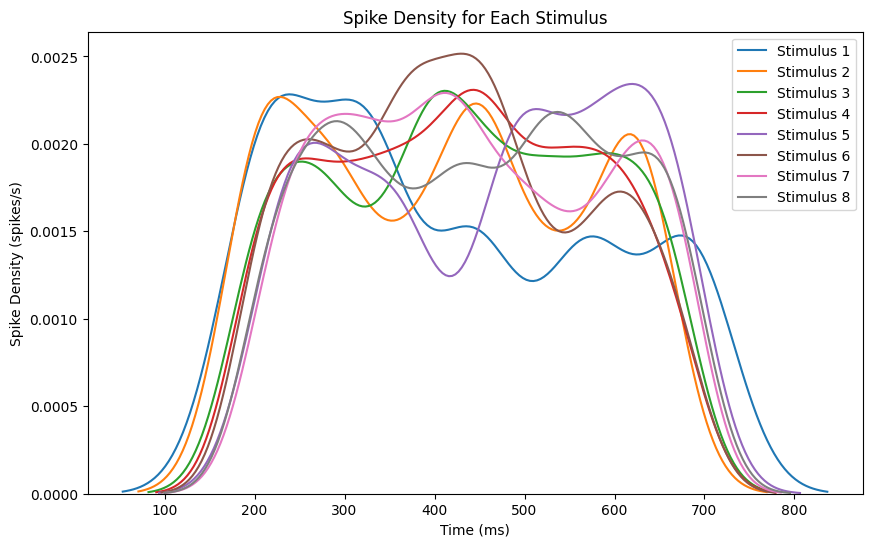

In [11]:
import seaborn as sns
# Bar plots for spike density
delta_t = 5  # Time window in ms
delta_t_samples = int(delta_t / dt)
stim_start = int(200 / dt)
stim_end = int(700 / dt)

plt.figure(figsize=(10, 6))

for i, spike_train in enumerate(raster_all):
    spike_train = spike_train[0]
    spt_stim = spike_train[40:140]  # Stimulation period
    spiketimes = np.where(spt_stim == 1)[0] * 5 + 200  # Spike times in ms


    sns.kdeplot(spiketimes, label=f'Stimulus {i+1}', bw_adjust=0.5)  # Adjust bw_adjust for smoothing

plt.xlabel('Time (ms)')
plt.ylabel('Spike Density (spikes/s)')
plt.title('Spike Density for Each Stimulus')
plt.legend()
plt.show()


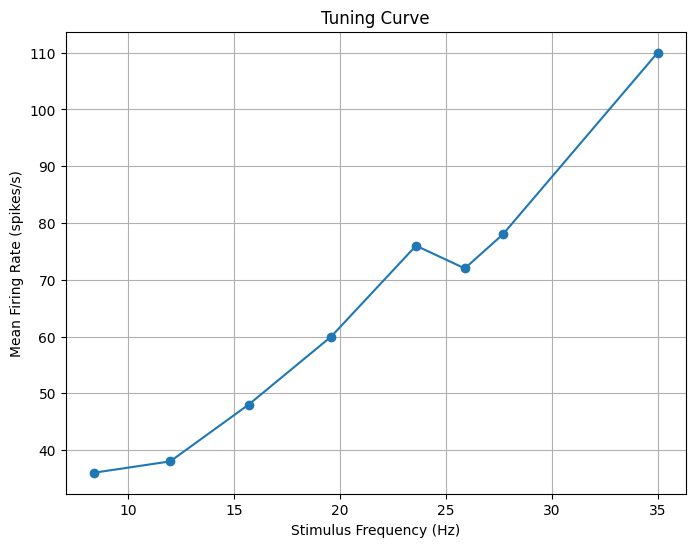

In [12]:
#   For each raster plot, compute the spikes count,its mean and variance
# the tuning curve of the neuron, i.e., its average firing rate (=spike count / sec) against freq stim
spike_counts_per_raster = []
mean_firing_rates = []
variances_firing_rates = []


for spike_train in raster_all:
  spike_train = spike_train[0]
  spt_stim = spike_train[40:140]  # Stimulation period (200-700 ms)


  spike_count = np.sum(spt_stim)
  spike_counts_per_raster.append(spike_count)
  # Calculate mean and variance for the current raster plot
  mean_spike_count = np.mean(spike_count)

  mean_firing_rates.append(mean_spike_count / 0.5)  # Calculate mean firing rate in spikes/second

# Tuning curve
plt.figure(figsize=(8, 6))
plt.plot(f1, mean_firing_rates, 'o-')  # Plotting mean firing rates against stimulus frequency (f1)
plt.xlabel('Stimulus Frequency (Hz)')
plt.ylabel('Mean Firing Rate (spikes/s)')
plt.title('Tuning Curve')
plt.grid(True)
plt.show()
